# Download Dataset

In [1]:
! wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'

--2021-07-31 21:09:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7665 (7.5K) [application/x-httpd-php]
Saving to: ‘dataR2.csv’

dataR2.csv          100%[===================>]   7.49K  --.-KB/s    in 0s      

2021-07-31 21:09:17 (164 MB/s) - ‘dataR2.csv’ saved [7665/7665]



# Load DataSet

In [2]:
import pandas as pd

df = pd.read_csv('./dataR2.csv')
# shuffle:
df = df.sample(frac=1, axis=1).reset_index(drop=True)
df =df.sample(frac=1).reset_index(drop=True)
df

,Glucose,HOMA,Insulin,Age,Classification,Resistin,MCP.1,Adiponectin,Leptin,BMI
0,105,1.144780,4.420,72,2,4.82000,195.940,17.860000,21.7800,23.620000
1,108,2.346451,8.808,69,2,16.48508,353.568,5.288025,14.7485,28.444444
2,101,3.869788,15.533,66,1,22.32024,864.968,7.539550,74.7069,36.212279
3,97,2.510147,10.491,65,2,20.46850,396.648,3.710090,44.0217,30.915577
4,87,0.972138,4.530,34,1,5.62592,572.783,7.642760,28.7502,31.975015
...,...,...,...,...,...,...,...,...,...,...
111,97,5.271762,22.033,41,2,27.83250,783.796,13.494865,44.7059,26.672763
112,84,0.906707,4.376,35,1,16.43706,733.797,9.048185,39.2134,30.276817
113,93,0.687971,2.999,42,2,17.37615,321.919,8.462915,19.0826,21.359915
114,86,1.600000,7.553,44,1,7.64000,63.610,20.320000,14.0900,20.760000


# Feature Representation 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d7cfcb150>,
      dtype=object)

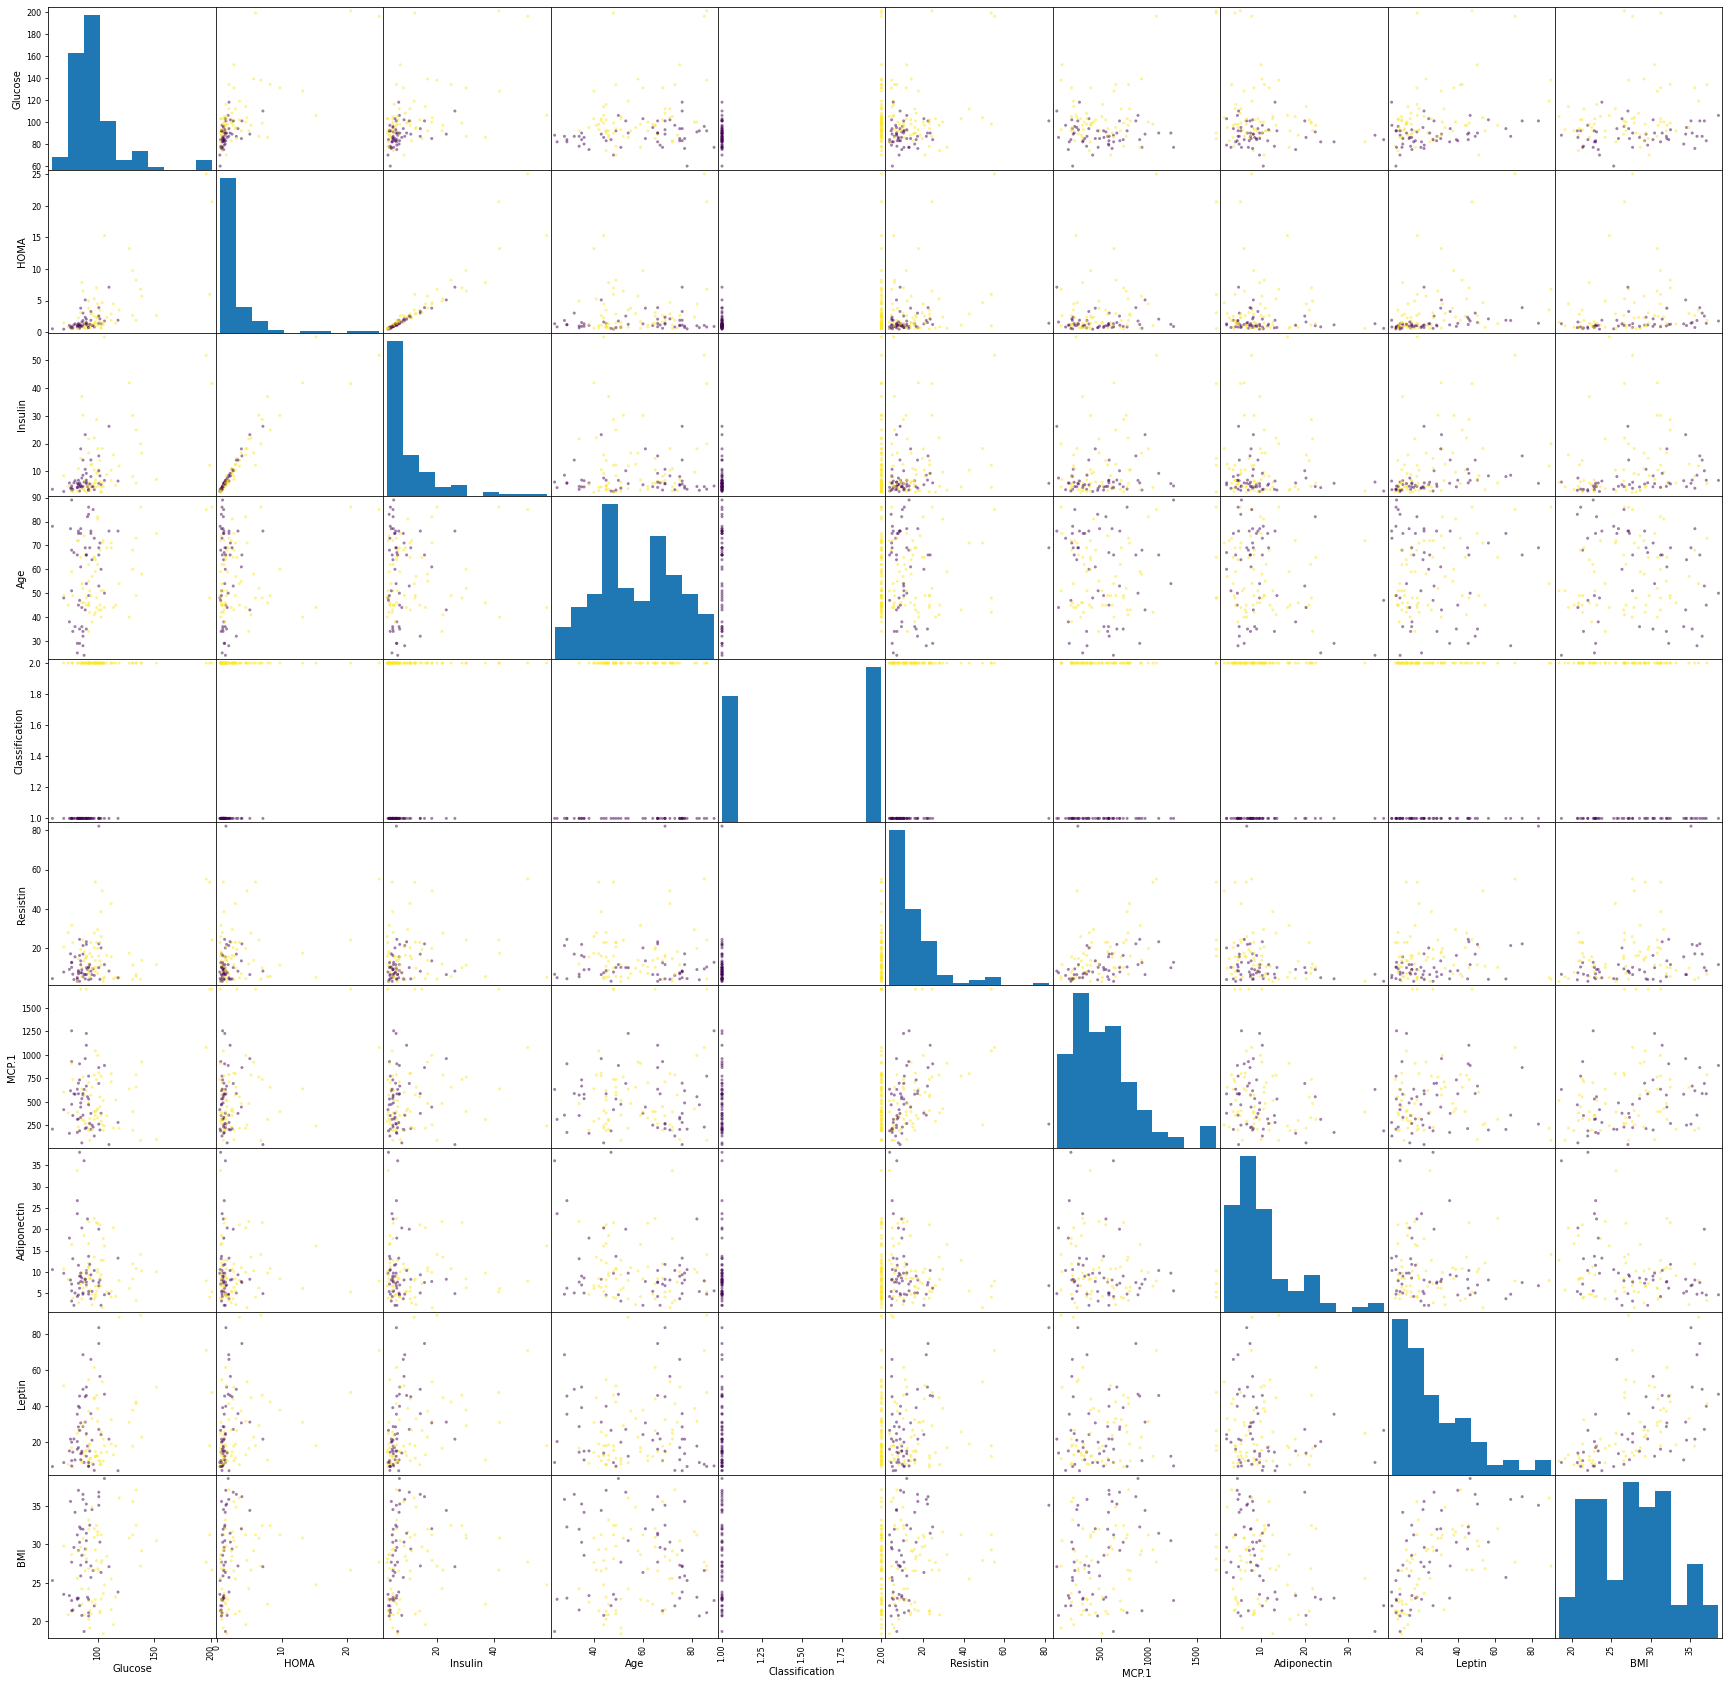

In [3]:
pd.plotting.scatter_matrix(df, c=df.Classification, figsize=[30, 30])

***Tow Feature:***

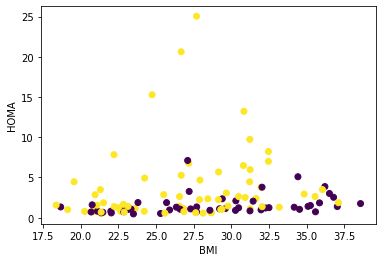

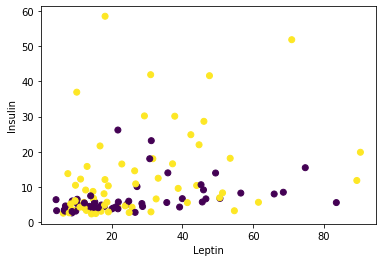

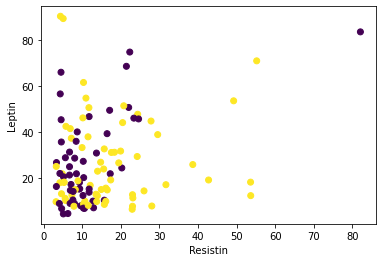

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']

def plot_tow_feature(x_index, y_index):
    x = df[features[x_index]]
    y = df[features[y_index]]
    z = df.Classification
    plt.scatter(x, y, c=z)
    plt.xlabel(features[x_index])
    plt.ylabel(features[y_index])
    plt.show()
plot_tow_feature(1, 4)
plot_tow_feature(5, 3)
plot_tow_feature(7, 5)

***One Feature:***

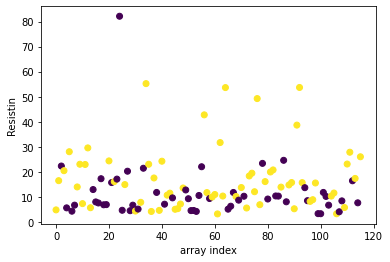

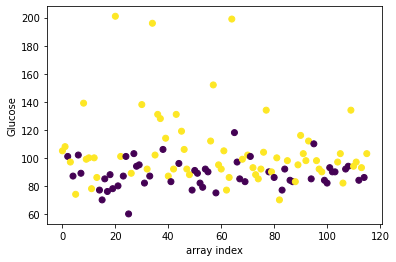

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']

y_index = 7
def plot_one_feature(y_index):
    y = df[features[y_index]]
    x = list(range(0,len(y)))
    z = df.Classification
    plt.scatter(x, y, c=z)
    plt.xlabel("array index")
    plt.ylabel(features[y_index])
    plt.show()

plot_one_feature(7)
plot_one_feature(2)

# General Functions

In [6]:
from sklearn.model_selection import cross_val_score
from numpy import mean

def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

def get_dataset():
    df_ = df.copy()
    y= df_.Classification
    x = df_.drop(['Classification'],axis=1)
    y=np.array(y.values.tolist())
    x=np.array(x.values.tolist())
    x, y = unison_shuffle(x, y)
    # x = (x - np.mean(x)) / np.std(x)
    return x, y

def evaluate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return mean(scores), scores.min(), scores.max()
 
def five_fold_cross_validation(model):
    k=5
    x, y = get_dataset()
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    fold_num=1
    for train_index, test_index in kf.split(x):
        print("Fold ", fold_num, ':')
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_train)
        print("         train accuracy: ", accuracy_score(y_train,y_pred))
        y_pred = model.predict(X_test)
        print("         test accuracy: ", accuracy_score(y_test,y_pred))
        fold_num+=1


# LogisticRegression

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss 
import numpy as np


x, y = get_dataset();
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
reg = LogisticRegression(max_iter = 2000)
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
print("test accuracy: ", accuracy_score(y_test,y_pred))
y_pred = reg.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,y_pred))


test accuracy:  0.9166666666666666
train accuracy:  0.7717391304347826


**k-Fold-cross-validation (k=**5**)**

In [37]:
k=5
x, y = get_dataset()
reg = LogisticRegression(max_iter = 2000)
cv = KFold(n_splits=k, shuffle=True, random_state=1)
k_mean, k_min, k_max = evaluate_model(reg, x, y, cv)
print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=5, accuracy=0.731 (min_acc: 0.609, max_acc: 0.917)


In [9]:
reg = LogisticRegression(max_iter = 2000)
five_fold_cross_validation(reg)

Fold  1 :
         train accuracy:  0.7717391304347826
         test accuracy:  0.7083333333333334
Fold  2 :
         train accuracy:  0.7849462365591398
         test accuracy:  0.7391304347826086
Fold  3 :
         train accuracy:  0.7849462365591398
         test accuracy:  0.7391304347826086
Fold  4 :
         train accuracy:  0.7419354838709677
         test accuracy:  0.6086956521739131
Fold  5 :
         train accuracy:  0.7849462365591398
         test accuracy:  0.6956521739130435


**best k for k-Fold-cross-validation**

In [10]:
def evaluate_model(model,X, y, cv):
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return mean(scores), scores.min(), scores.max()

x, y = get_dataset()
# define folds to test
folds = range(2,16)
# evaluate each k value
for k in folds:
  reg = LogisticRegression(max_iter = 2000)
  cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
  k_mean, k_min, k_max = evaluate_model(reg, x, y, cv)
	# report performance
  print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=2, accuracy=0.672 (min_acc: 0.655, max_acc: 0.690)
> folds=3, accuracy=0.715 (min_acc: 0.684, max_acc: 0.744)
> folds=4, accuracy=0.724 (min_acc: 0.690, max_acc: 0.793)
> folds=5, accuracy=0.724 (min_acc: 0.609, max_acc: 0.870)
> folds=6, accuracy=0.715 (min_acc: 0.632, max_acc: 0.842)
> folds=7, accuracy=0.742 (min_acc: 0.647, max_acc: 0.875)
> folds=8, accuracy=0.714 (min_acc: 0.571, max_acc: 0.867)
> folds=9, accuracy=0.732 (min_acc: 0.615, max_acc: 0.923)
> folds=10, accuracy=0.734 (min_acc: 0.545, max_acc: 0.917)
> folds=11, accuracy=0.732 (min_acc: 0.545, max_acc: 0.909)
> folds=12, accuracy=0.732 (min_acc: 0.444, max_acc: 0.900)
> folds=13, accuracy=0.750 (min_acc: 0.444, max_acc: 1.000)
> folds=14, accuracy=0.731 (min_acc: 0.375, max_acc: 1.000)
> folds=15, accuracy=0.732 (min_acc: 0.429, max_acc: 1.000)


# SVM (linear kernel)

In [11]:
from sklearn.svm import SVC

x, y = get_dataset();
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("test accuracy", accuracy_score(y_test,y_pred))
y_pred = clf.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,y_pred))


test accuracy 0.7083333333333334
train accuracy:  0.7934782608695652


**k-Fold-cross-validation (k=5)**

In [12]:
k=5
x, y = get_dataset()
clf = SVC(kernel='linear')
cv = KFold(n_splits=k, shuffle=True, random_state=1)
k_mean, k_min, k_max = evaluate_model(clf,x, y, cv)
print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=5, accuracy=0.664 (min_acc: 0.583, max_acc: 0.783)


In [13]:
clf = SVC(kernel='linear')
five_fold_cross_validation(clf)

Fold  1 :
         train accuracy:  0.8043478260869565
         test accuracy:  0.7916666666666666
Fold  2 :
         train accuracy:  0.7849462365591398
         test accuracy:  0.6086956521739131
Fold  3 :
         train accuracy:  0.7741935483870968
         test accuracy:  0.6956521739130435
Fold  4 :
         train accuracy:  0.8064516129032258
         test accuracy:  0.6521739130434783
Fold  5 :
         train accuracy:  0.8064516129032258
         test accuracy:  0.7391304347826086


**best k for k-Fold-cross-validation**

In [14]:
x, y = get_dataset()
# define folds to test
folds = range(2,16)
# evaluate each k value
for k in folds:
  clf = SVC(kernel='linear')
  cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
  k_mean, k_min, k_max = evaluate_model(clf, x, y, cv)
	# report performance
  print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=2, accuracy=0.750 (min_acc: 0.741, max_acc: 0.759)
> folds=3, accuracy=0.690 (min_acc: 0.615, max_acc: 0.744)
> folds=4, accuracy=0.716 (min_acc: 0.655, max_acc: 0.828)
> folds=5, accuracy=0.723 (min_acc: 0.565, max_acc: 0.875)
> folds=6, accuracy=0.724 (min_acc: 0.632, max_acc: 0.850)
> folds=7, accuracy=0.723 (min_acc: 0.562, max_acc: 0.824)
> folds=8, accuracy=0.725 (min_acc: 0.533, max_acc: 0.867)
> folds=9, accuracy=0.714 (min_acc: 0.583, max_acc: 0.846)
> folds=10, accuracy=0.732 (min_acc: 0.545, max_acc: 0.917)
> folds=11, accuracy=0.731 (min_acc: 0.500, max_acc: 0.909)
> folds=12, accuracy=0.731 (min_acc: 0.444, max_acc: 0.900)
> folds=13, accuracy=0.738 (min_acc: 0.375, max_acc: 0.889)
> folds=14, accuracy=0.731 (min_acc: 0.375, max_acc: 1.000)
> folds=15, accuracy=0.756 (min_acc: 0.286, max_acc: 1.000)


# SVM (RBF kernel)

In [15]:
from sklearn.svm import SVC


x, y = get_dataset();
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("test accuracy", accuracy_score(y_test,y_pred))
y_pred = clf.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,y_pred))


test accuracy 0.5
train accuracy:  0.5652173913043478


**k-Fold-cross-validation (k=5)**

In [16]:
k=5
x, y = get_dataset()
clf = SVC(kernel='rbf')
cv = KFold(n_splits=k, shuffle=True, random_state=1)
k_mean, k_min, k_max = evaluate_model(clf, x, y, cv)
print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=5, accuracy=0.551 (min_acc: 0.478, max_acc: 0.667)


In [17]:
clf = SVC(kernel='rbf')
five_fold_cross_validation(clf)

Fold  1 :
         train accuracy:  0.5869565217391305
         test accuracy:  0.4166666666666667
Fold  2 :
         train accuracy:  0.5161290322580645
         test accuracy:  0.5217391304347826
Fold  3 :
         train accuracy:  0.5806451612903226
         test accuracy:  0.43478260869565216
Fold  4 :
         train accuracy:  0.5483870967741935
         test accuracy:  0.5652173913043478
Fold  5 :
         train accuracy:  0.5376344086021505
         test accuracy:  0.6086956521739131


**best k for k-Fold-cross-validation**

In [18]:
x, y = get_dataset()

# define folds to test
folds = range(2,16)
# evaluate each k value
for k in folds:
  clf = SVC(kernel='rbf')
  cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
  k_mean, k_min, k_max = evaluate_model(clf, x, y, cv)
	# report performance
  print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=2, accuracy=0.448 (min_acc: 0.414, max_acc: 0.483)
> folds=3, accuracy=0.491 (min_acc: 0.447, max_acc: 0.564)
> folds=4, accuracy=0.552 (min_acc: 0.448, max_acc: 0.621)
> folds=5, accuracy=0.526 (min_acc: 0.478, max_acc: 0.609)
> folds=6, accuracy=0.543 (min_acc: 0.421, max_acc: 0.684)
> folds=7, accuracy=0.508 (min_acc: 0.412, max_acc: 0.647)
> folds=8, accuracy=0.541 (min_acc: 0.357, max_acc: 0.733)
> folds=9, accuracy=0.550 (min_acc: 0.333, max_acc: 0.769)
> folds=10, accuracy=0.541 (min_acc: 0.273, max_acc: 0.750)
> folds=11, accuracy=0.532 (min_acc: 0.300, max_acc: 0.818)
> folds=12, accuracy=0.547 (min_acc: 0.222, max_acc: 0.800)
> folds=13, accuracy=0.524 (min_acc: 0.222, max_acc: 0.778)
> folds=14, accuracy=0.551 (min_acc: 0.250, max_acc: 0.875)
> folds=15, accuracy=0.549 (min_acc: 0.250, max_acc: 0.875)


# Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

x, y = get_dataset();
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

D_Tree=DecisionTreeClassifier()
D_Tree.fit(x_train,y_train)
y_pred = D_Tree.predict(x_test)
print("test accuracy", accuracy_score(y_test,y_pred))
y_pred = D_Tree.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,y_pred))


test accuracy 0.75
train accuracy:  1.0


**k-Fold-cross-validation (k=5)**

In [28]:
k=5
x, y = get_dataset()
D_Tree=DecisionTreeClassifier()
cv = KFold(n_splits=k, shuffle=True, random_state=1)
k_mean, k_min, k_max = evaluate_model(D_Tree, x, y, cv)
print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=5, accuracy=0.715 (min_acc: 0.565, max_acc: 0.870)


In [21]:
D_Tree=DecisionTreeClassifier()
five_fold_cross_validation(D_Tree)

Fold  1 :
         train accuracy:  1.0
         test accuracy:  0.75
Fold  2 :
         train accuracy:  1.0
         test accuracy:  0.6086956521739131
Fold  3 :
         train accuracy:  1.0
         test accuracy:  0.7391304347826086
Fold  4 :
         train accuracy:  1.0
         test accuracy:  0.782608695652174
Fold  5 :
         train accuracy:  1.0
         test accuracy:  0.5652173913043478


**best k for k-Fold-cross-validation**

In [22]:
x, y = get_dataset()
# define folds to test
folds = range(2,16)
# evaluate each k value
for k in folds:
  D_Tree=DecisionTreeClassifier()
  cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
  k_mean, k_min, k_max = evaluate_model(D_Tree,x, y, cv)
	# report performance
  print('> folds=%d, accuracy=%.3f (min_acc: %.3f, max_acc: %.3f)' % (k, k_mean, k_min, k_max))


> folds=2, accuracy=0.655 (min_acc: 0.638, max_acc: 0.672)
> folds=3, accuracy=0.690 (min_acc: 0.615, max_acc: 0.744)
> folds=4, accuracy=0.759 (min_acc: 0.690, max_acc: 0.897)
> folds=5, accuracy=0.751 (min_acc: 0.625, max_acc: 0.913)
> folds=6, accuracy=0.708 (min_acc: 0.600, max_acc: 0.842)
> folds=7, accuracy=0.748 (min_acc: 0.625, max_acc: 0.882)
> folds=8, accuracy=0.740 (min_acc: 0.500, max_acc: 0.933)
> folds=9, accuracy=0.765 (min_acc: 0.500, max_acc: 0.923)
> folds=10, accuracy=0.741 (min_acc: 0.455, max_acc: 0.917)
> folds=11, accuracy=0.784 (min_acc: 0.500, max_acc: 1.000)
> folds=12, accuracy=0.790 (min_acc: 0.556, max_acc: 1.000)
> folds=13, accuracy=0.775 (min_acc: 0.333, max_acc: 1.000)
> folds=14, accuracy=0.739 (min_acc: 0.444, max_acc: 1.000)
> folds=15, accuracy=0.723 (min_acc: 0.375, max_acc: 1.000)


# K neighbors classifier(KNN)

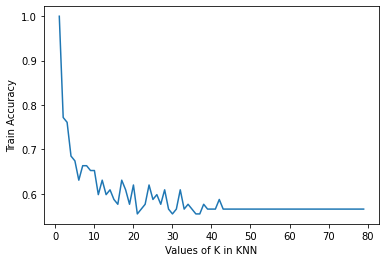

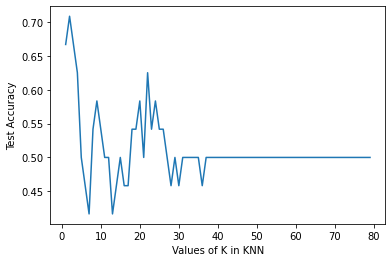

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

x, y = get_dataset();
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

k_knn_range = range(1, 80)
scores = []
scores_train = []
for k in k_knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    y_pred = knn.predict(x_train)
    scores_train.append(accuracy_score(y_train, y_pred))

plt.plot(k_knn_range, scores_train)
plt.xlabel('Values of K in KNN')
plt.ylabel('Train Accuracy')
plt.show()

plt.plot(k_knn_range, scores)
plt.xlabel('Values of K in KNN')
plt.ylabel('Test Accuracy')
plt.show()

**k-Fold-cross-validation (k=5)**

Text(0, 0.5, 'Test Accuracy')

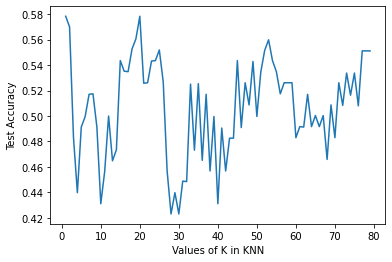

In [24]:
k=5
x, y = get_dataset()
scores = []
k_knn_range = range(1, 80)
scores = []
for K in k_knn_range:
    knn = KNeighborsClassifier(n_neighbors = K)
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    k_mean, k_min, k_max = evaluate_model(knn,x, y, cv)
    scores.append(k_mean)

plt.plot(k_knn_range, scores)
plt.xlabel('Values of K in KNN')
plt.ylabel('Test Accuracy')

In [25]:
knn = KNeighborsClassifier(n_neighbors = 25)
five_fold_cross_validation(knn)

Fold  1 :
         train accuracy:  0.5652173913043478
         test accuracy:  0.7083333333333334
Fold  2 :
         train accuracy:  0.5591397849462365
         test accuracy:  0.5217391304347826
Fold  3 :
         train accuracy:  0.5806451612903226
         test accuracy:  0.5217391304347826
Fold  4 :
         train accuracy:  0.5376344086021505
         test accuracy:  0.5652173913043478
Fold  5 :
         train accuracy:  0.6129032258064516
         test accuracy:  0.30434782608695654


**best k for k-Fold-cross-validation**

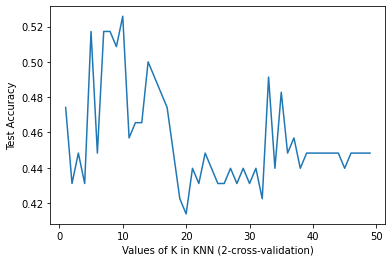

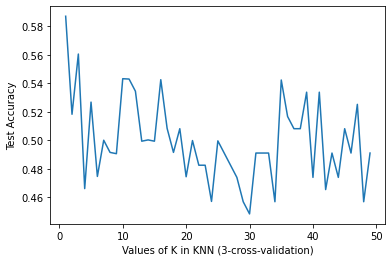

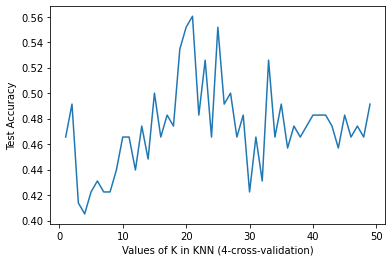

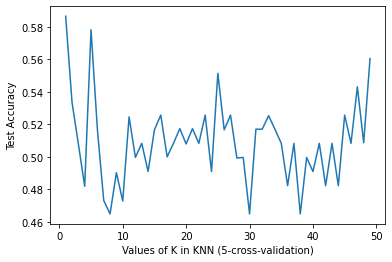

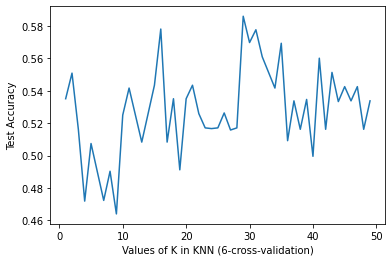

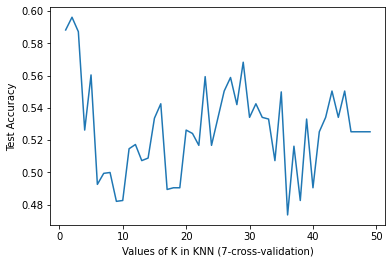

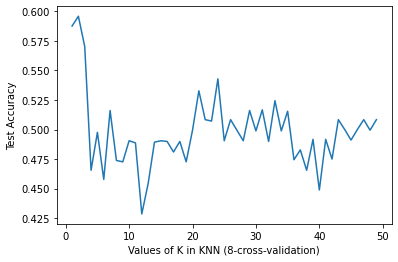

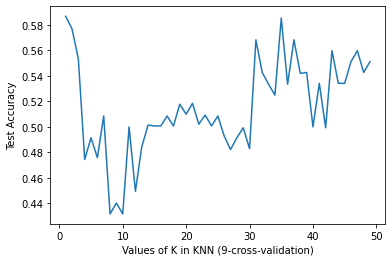

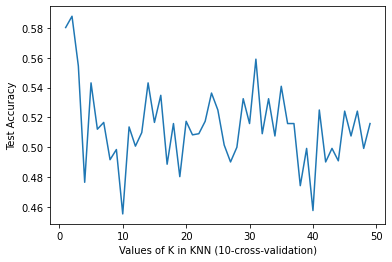

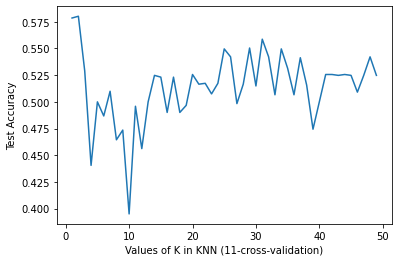

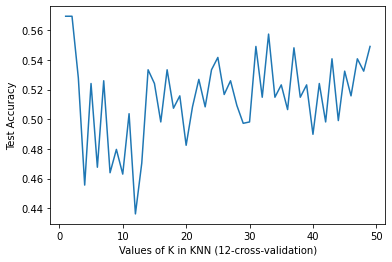

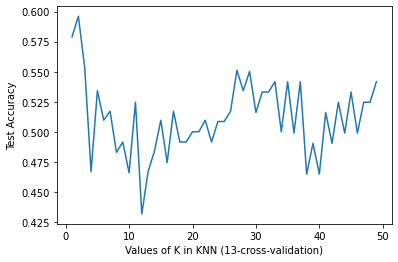

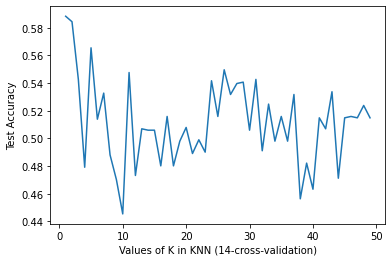

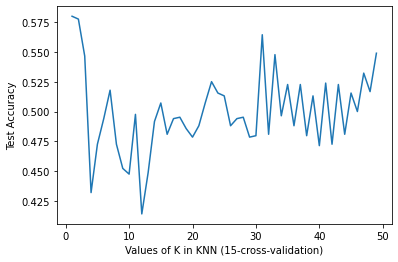

In [26]:
x, y = get_dataset()
# define folds to test
folds = range(2,16)
# evaluate each k value
for k in folds:
  scores = []
  k_knn_range = range(1, 50)
  scores = []
  for K in k_knn_range:
      knn = KNeighborsClassifier(n_neighbors = K)
      cv = KFold(n_splits=k, shuffle=True, random_state=1)
      k_mean, k_min, k_max = evaluate_model(knn,x, y, cv)
      scores.append(k_mean)

  plt.plot(k_knn_range, scores)
  plt.xlabel('Values of K in KNN (%d-cross-validation)' %(k))
  plt.ylabel('Test Accuracy')
  plt.show()